# End to End Machine Learning

Coding in this notebook to step through a ML project end to end

## Step 1 - Download the data

In [47]:
# Let's write a small function to download the data to our working directory

import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [48]:
# Calling the function fetch_housing_data() should now load the data
fetch_housing_data()

## Step 2 - Load the data

In [49]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [50]:
# Once the data is loaded, let's look at the data structure
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [51]:
# Now let's take a quick look into all the attributes of this data set. To do that let's use the info() method
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [52]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [53]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


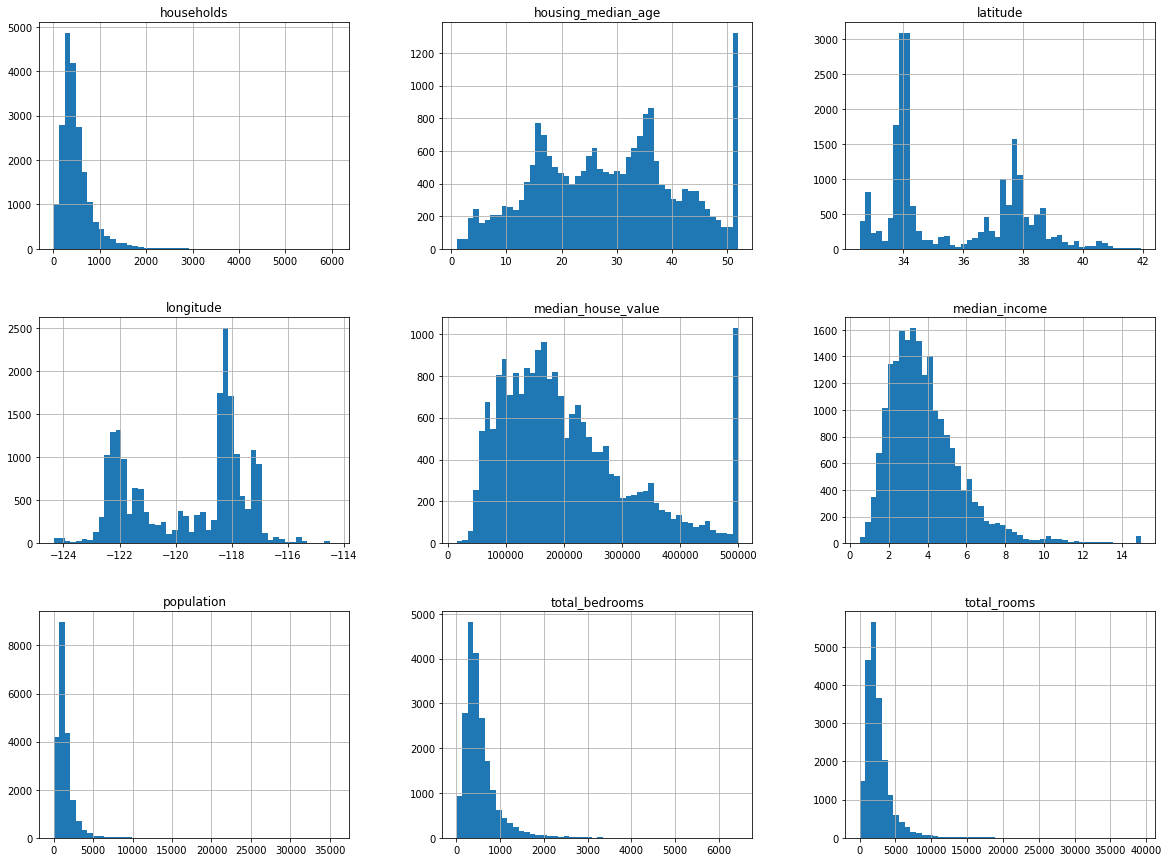

In [54]:
"""Another more intuitive way to look at the data is to plat histograms of the numerical attributes"""

%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20,15))
plt.show() # In Jupyter, calling the plt.show() function is optional as Jupyter will always render plots from matplotlib


Looking at the above histograms, it appears these are not scaled. The attributes have very different scales and we'll need to scale them in order to make these more bell shaped plots. We'll do that later. Other things to notice are the median house value is capped at $500,000. We'll need to fix that as well before we can feed out ML algorithm to it

## Step 3 - Create a test set and put it aside for later evaluation of the model


In [55]:
# To make this notebook's output consistent let's seed out random number generator

import numpy as np
np.random.seed(42)

# Define a function to split the entire data set into training and test set. test set ratio = 0.2

def split_train_test(data, test_ratio):
    
    """
    Function defined to take the entire dataset and a test split ratio as inputs and return 20% of the data as
    test data and 80% as training data
    
    ############################################################
    ARGS:
        1. Original Dataset
        2. Test set split ratio  - Typically this is 20% or 0.20
    
    RETURNS:
        1. Training Data Set
        2. Test Data Set
    
    #############################################################
    """
    
    # shuffle the original data set randomly in order to reduce 'sampling bias'
    
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [56]:
# Now, let's call the function to create the training and test data

train_set, test_set = split_train_test(housing, 0.2)
print("Number of elements in training set is" + " " + str(len(train_set)))
print("Number of elements in test set is" + " " + str(len(test_set)))

Number of elements in training set is 16512
Number of elements in test set is 4128


So this works but this solution is not perfect. If we upload an updated dataset, this will generate a completely different training and test sets. So , we need to find a better solution to this split

One way to do this is to use each data instance's unique identifier to determine whether or not it goes into the test set. So, the next problem is how to identify a unique identifier.

One way to do that is to compute a hash of each instance and keep the last byte of the has if it's value is lower than 51 (~20% of 256)

Doing this ensures that the test set will reamin consistent even if we run the split on updated data. Let's see this now:

In [57]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_test_train_by_id(data, test_ratio, id_column, hash = hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [58]:
# The housing data does not have an id column so the simplest method is to use the row index as the instance id

housing_with_id = housing.reset_index() # Adds an "index" column to the original housing data set
train_set, test_set = split_test_train_by_id(housing_with_id, 0.2, "index")

print("Number of elements in training set is" + " " + str(len(train_set)))
print("Number of elements in the test set is" + " " + str(len(test_set)))

Number of elements in training set is 16362
Number of elements in the test set is 4278


Another point to note about this implementation of the data split is that if we use row indices as unique ids, we need to make sure that no row ever gets deleted and any new row gets appended to the existing dataset

Sci-Kit Learn provides some built in functions to do the split as well. One of the simplest ones is train_test_split. Let's see how to use that. 

This function does pretty much what our defined function does but with some additional features. First, it has a random generator that makes sure that the random state of the split is preserved. Second, it allows to pass multiple datasets with identical number of rows and it will split them on the same indices. This is particularily useful if the labels are in a different file

In [59]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

print("Train Set" + ": " + str(len(train_set)))
print("Test Set" + ": " + str(len(test_set)))

Train Set: 16512
Test Set: 4128


In [60]:
# Lastly, let's create a stratified train and test split using sklearn

# Divide by 1.5 to limit the number of income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)



from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [61]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [62]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [63]:
compare_props

,Overall,Random,Stratified,Rand. %error,Strat. %error
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309
2.0,0.318847,0.324370,0.318798,1.732260,-0.015195
3.0,0.350581,0.358527,0.350533,2.266446,-0.013820
4.0,0.176308,0.167393,0.176357,-5.056334,0.027480
5.0,0.114438,0.109496,0.114583,-4.318374,0.127011


Look at the above results. It clearly shows that the Stratified sampling is more close to the overall data distribution that a purely random sampling method

## Step 4 - Discover and Visualize data
In this section, let's take a more closer look at the original data by visualizing to get an intuition on the underlying patterns in the data

In [64]:
housing = strat_train_set.copy()

### Visualizing Geographical Data

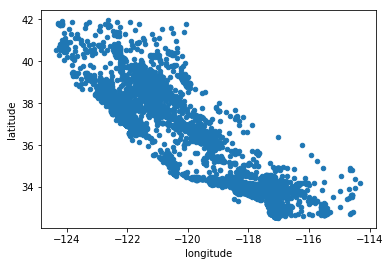

In [65]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude")

So, this is a scatter plot and looks very similar to the state of CA. But nothing other than that. Let's try using an alpha value of 0.1 to visualize the places where there is a high density of data points

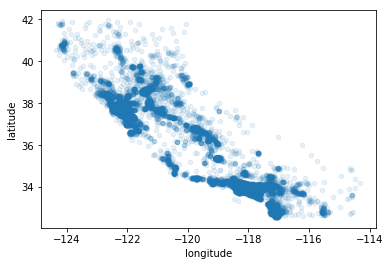

In [66]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1) # parameter alpha is the range of RGB
#values and is between the range 0-1

Ok, so now we can see some early patterns. Around the LA and SFO areas there are more data points and that is expected as the population density in those areas is higher relative to other districts in the state of CA.

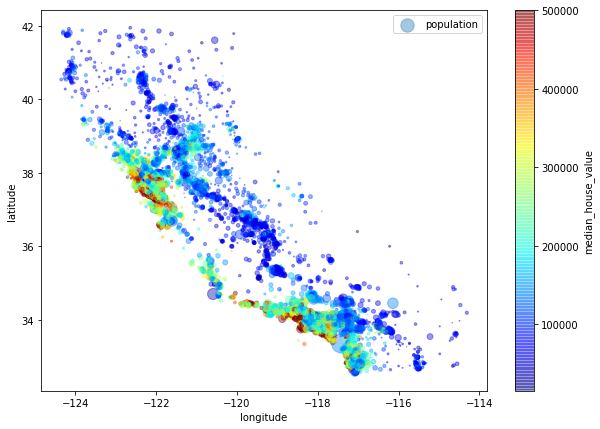

In [67]:
# Now let's look at the housing prices in these regions in a color map

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

Now, the above figure gives a better intuition of prices in various geographical locations. For example, prices tend to be higher in the SFO, LA, San Diego areas whereas it is relatively lower in the areas around the central valley.

Another insight is that the prices tend to higher along the coast of CA. But in the Norcal this may not be the standard rule

### Looking for correlation coefficients
Remember, that our dataset contains 20,460 rows and each row has 10 attributes. In data science, it is important to look for correlations between various attributes. The correlation coefficient (also know as Pearson's coefficient) is an important metric that gives some intuition on how various attributes weigh in on each other.

In [68]:
correlation_matrix = housing.corr() # This method will calculate the correlations amongst all the attributes

In [69]:
# Let's look at all the correlations against Median House Value
correlation_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Do not a point about correlation coefficients. They only measure linear relationships between two variables and the values range between -1 and 1. 1 suggests a strong positive correlation whereas -1 suggests a strong negative correlation.

Another way to look at coorelations is to use Pandas' scatter_matrix() function. Let's see below how to:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1114fad30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10d681048>]], dtype=object)

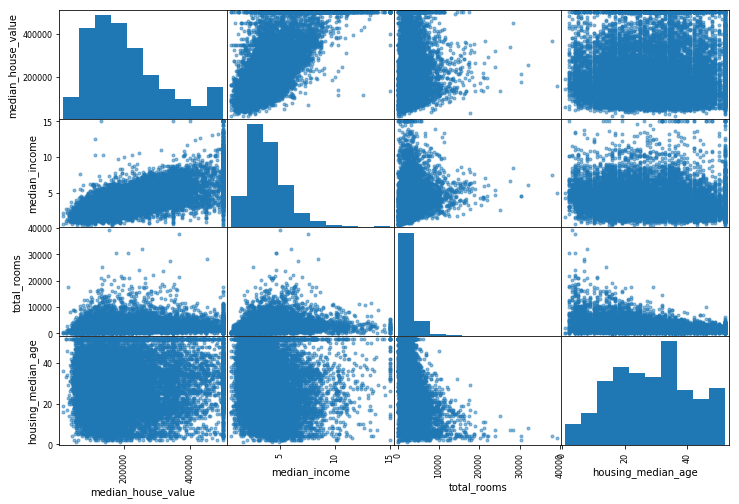

In [71]:
from pandas.tools.plotting import scatter_matrix

argument_dataframe = ["median_house_value", "median_income", "total_rooms", "housing_median_age"] 
"""The scatter_matrix() plotting function only takes in dataframes as an input"""

scatter_matrix(housing[argument_dataframe], figsize = (12, 8))

The scatter_matrix() function will plot a scatter plot for the variables against itself along the main diagonal but that would not be very useful so Pandas creates a histogram from those variables. But for other variable combinations, it generates a scatter plot

Also, one of the most important attribute that gives a sense of the housing price is the median income. So, let's zoom in on that scatter plot

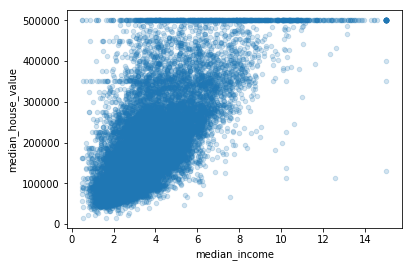

In [72]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.2)

### Step 5 - Prepare the data for machine learning algorithms

Now that we have taken a look at what the data looks like, it is time to prepare our data for ML algorithms. Instead of doing this manually, I am going to write several functions and for good reasons:

1. Writing functions will allow reproducing these data transformations easily on new data sets (for example, an updates version of the original dataset)
2. We will gradually build a library of functions that we could use in future projects
3. We can use these functions in our live systems to apply data transformations before feeding it to the ML algorithm
4. This will make it possible for us to try various transformations and see which ones works best


In [74]:
# First, let's create a training set of input features
housing = strat_train_set.drop("median_house_value", axis = 1) # Remove the price column from the input dataset

# Second, let's create a training set of labels, i.e the housing price
housing_labels = strat_train_set["median_house_value"].copy()

In [81]:
#Now, let's look at some sample incomplete rows

sample_incomplete_rows = housing[housing.isnull().any(axis = 1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,2.0
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,4.0
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,4.0
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,2.0
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,3.0


So now we see that there are some rows with NaN values against the "total_bedrooms" attribute. Before we feed this dataset to our ML algorithm, we'll need to fix those incomplete values. There are several ways to do that:

1. Drop all the rows that have NaN as an attribute value from the dataset
2. Fill out all the NaN rows with the median value
3. Get rid of the whole attribute

Let's see how to do each of these


In [83]:
# Option 1 - Drop all rows that have NaN value in total_bedrooms
sample_incomplete_rows.dropna(subset = ["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat


In [84]:
# Option 2 - Get rid of the whole attribute
sample_incomplete_rows.drop("total_bedrooms", axis = 1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN,2.0
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN,4.0
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN,4.0
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND,2.0
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN,3.0


In [85]:
# Option 3 - Fill out all the NaN values with some value (zeros, median, average, etc.)
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace = True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN,2.0
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN,4.0
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN,4.0
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND,2.0
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN,3.0
